In [28]:
import numpy as np
import matplotlib.pyplot as plt

Largo = 10 #En centimetros
Temp_inicial = 0
Temp_extremos = [100, 50]
k = 0.835 #cm^2/s
tiempo_limite = 10 #segundos


deltax = 2 #cm
deltat = 1#s


In [29]:
def metodo_explicito (Largo,temp_inicial,temp_extremos,k,timepo_limite,deltax,deltat):

    #Parametros inciales
    puntos_pos = np.arange(0,Largo+deltax,deltax)
    puntos_tiempo = np.arange(0,tiempo_limite+deltat,deltat)
    Coeficiente = (k*deltat)/(deltax**2)


    #cargo el primer momento de la barra 
    T = np.ones(len(puntos_pos))*Temp_inicial 
    T[0] = Temp_extremos[0] ; T[-1] = Temp_extremos[1] 

    #Necesito un vector que vaya almacenando los datos del siguiente punto
    T_almacenar = []
    Temp_sig = T.copy()

    for tiempo in puntos_tiempo:
      l = 1
      for posicion in puntos_pos:   
        if posicion == 0:
          Temp_sig[0] = Temp_extremos[0]
        elif posicion == Largo:
          Temp_sig[-1] = Temp_extremos[1]
        else:
          Temp_sig[l] = T[l]+ ((Coeficiente)*(T[l+1]-2*T[l]+T[l-1]))
          l += 1

      T_almacenar.append(T)
      T = Temp_sig.copy()

    return T_almacenar, puntos_pos


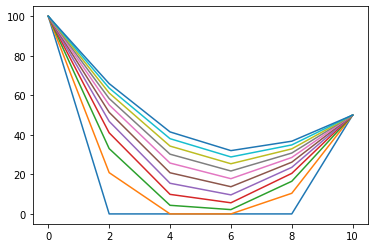

In [30]:
T_almacenar,puntos_pos = metodo_explicito (Largo,Temp_inicial,Temp_extremos,k,tiempo_limite,deltax,deltat)

for solucion in T_almacenar:
  plt.plot(puntos_pos,solucion)
  
plt.show()



In [51]:
def metodo_implicito (Largo,temp_inicial,temp_extremos,k,timepo_limite,deltax,deltat):

    #Parametros inciales
    puntos_pos = np.arange(0,Largo+deltax,deltax)
    puntos_tiempo = np.arange(0,tiempo_limite+deltat,deltat)
    Coeficiente = (k*deltat)/(deltax**2)

    #genero la matriz que debo resolver
    Matriz = np.zeros([len(puntos_pos),len(puntos_pos)])
    for i in range(1,len(puntos_pos)-1):
       for j in range(1,len(puntos_pos)-1):
          if i == j:
             Matriz[j,i] = 1+Coeficiente
             Matriz[j,i-1] = -Coeficiente
             Matriz[j,i+1] = -Coeficiente
    Matriz[0,0] = 1
    Matriz[len(puntos_pos)-1,len(puntos_pos)-1] = 1

    #cargo el primer momento de la barra 
    T = np.ones(len(puntos_pos))*Temp_inicial 
    T[0] = Temp_extremos[0] ; T[-1] = Temp_extremos[1] 

    #Necesito un vector que vaya almacenando los datos del siguiente punto
    T_almacenar = [T]
    Vector_B = T

    for tiempo in puntos_tiempo:

      Temp_sig = np.linalg.solve(Matriz,Vector_B)
      T_almacenar.append(Temp_sig)
      Vector_B = Temp_sig.copy()
      l = 1
      for posicion in puntos_pos:
          if posicion == 0:
            Vector_B[0] = Temp_extremos[0]
          elif posicion == Largo:
            Vector_B[-1] = Temp_extremos[1]
          else:
            Vector_B[l] = 2 * Vector_B[l] + ((Coeficiente)*(Vector_B[l+1]-2*Vector_B[l]+Vector_B[l-1]))
            l += 1




    return T_almacenar, puntos_pos

[100.   0.   0.   0.   0.  50.]
[100.          17.86698841   3.45735203   2.15252901   9.00669322
  50.        ]
[100.          63.27845149  27.5046556   17.7516462   33.62892951
  50.        ]
[100.         138.9819002   97.55509232  72.88823588  82.60522911
  50.        ]
[100.         280.57616942 273.49922007 229.48285421 196.02617411
  50.        ]
[100.         569.37844418 696.4380556  638.47384444 475.21420317
  50.        ]
[ 100.         1193.8708282  1700.20853448 1665.69327049 1171.27944445
   50.        ]
[ 100.         2595.33162229 4077.30769458 4194.19557689 2899.08004431
   50.        ]
[  100.          5814.04914484  9713.68445651 10349.52418503
  7152.52993529    50.        ]
[  100.         13314.11196976 23105.23804287 25238.16615284
 17543.05492222    50.        ]
[1.00000000e+02 3.09511233e+04 5.49826089e+04 6.11123128e+04
 4.27718002e+04 5.00000000e+01]
[1.00000000e+02 7.26711612e+04 1.30978414e+05 1.47343530e+05
 1.03755931e+05 5.00000000e+01]


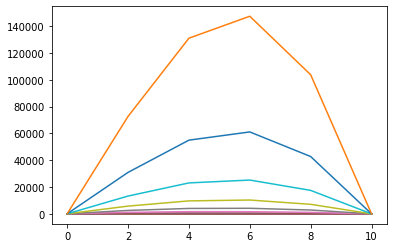

In [52]:

T_almacenar,puntos_pos = metodo_implicito (Largo,Temp_inicial,Temp_extremos,k,tiempo_limite,deltax,deltat)

for solucion in T_almacenar:
  plt.plot(puntos_pos,solucion)
  print(solucion)

  
plt.show()

